In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Loading the Olympics dataset from the drive
file_path = '/content/drive/My Drive/projects/olympics_dataset/olympics_dataset.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [6]:
df.shape

(252565, 11)

In [7]:
df.head(10)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
5,27,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,No medal
6,29,Einar Aalto,M,Finland,FIN,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,No medal
7,31,Jyri Aalto,M,Finland,FIN,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No medal
8,32,Minna Aalto,F,Finland,FIN,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No medal
9,33,Minna Aalto,F,Finland,FIN,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No medal


In [8]:
df.sample(5)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
105542,128636,Reino Kuivamki,M,Finland,FIN,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,No medal
94355,114410,Mujandjae Kasuto,M,Namibia,NAM,2012,Summer,London,Boxing,Boxing Men's Middleweight,No medal
56456,67493,Imre (schwartz-),M,Hungary,HUN,1928,Summer,Amsterdam,Athletics,Athletics Men's Long Jump,No medal
99946,121346,Fotios Klopas,M,United States,USA,1988,Summer,Seoul,Football,Football Men's Football,No medal
92389,111929,Juan Kahnert,M,Argentina,ARG,1948,Summer,London,Athletics,Athletics Men's Shot Put,No medal


In [9]:
df.describe()

,player_id,Year
count,2.525650e+05,252565.000000
mean,2.305499e+05,1981.743908
std,4.289330e+05,32.596548
min,0.000000e+00,1896.000000
25%,5.713700e+04,1960.000000
50%,1.356110e+05,1988.000000
75%,2.118590e+05,2008.000000
max,9.460001e+06,2024.000000


In [10]:
df.Sport.value_counts()

,count
Sport,
Athletics,43294
Gymnastics,26707
Swimming,26416
Shooting,12580
Rowing,11625
...,...
"Cycling Road, Cycling Mountain Bike",4
Basque Pelota,2
"Cycling Road, Triathlon",2


In [11]:
olympics_df_medal = df[df['Medal'] != 'No medal']
olympics_df_medal

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...
252551,4979564,Quincy Wilson,M,United States,USA,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,4980004,van Anne,F,Netherlands,NED,2024,Summer,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


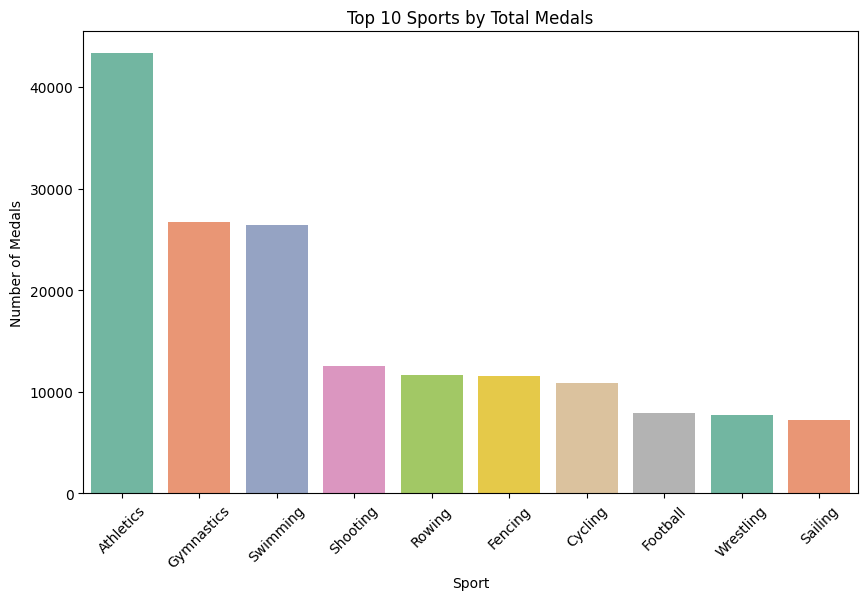

In [12]:
# Number of medals per sport
medals_per_sport = df[df['Medal'] != 'None']['Sport'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=medals_per_sport.index[:10], y=medals_per_sport.values[:10], hue=medals_per_sport.index[:10], palette='Set2', legend=False)
plt.title('Top 10 Sports by Total Medals')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()


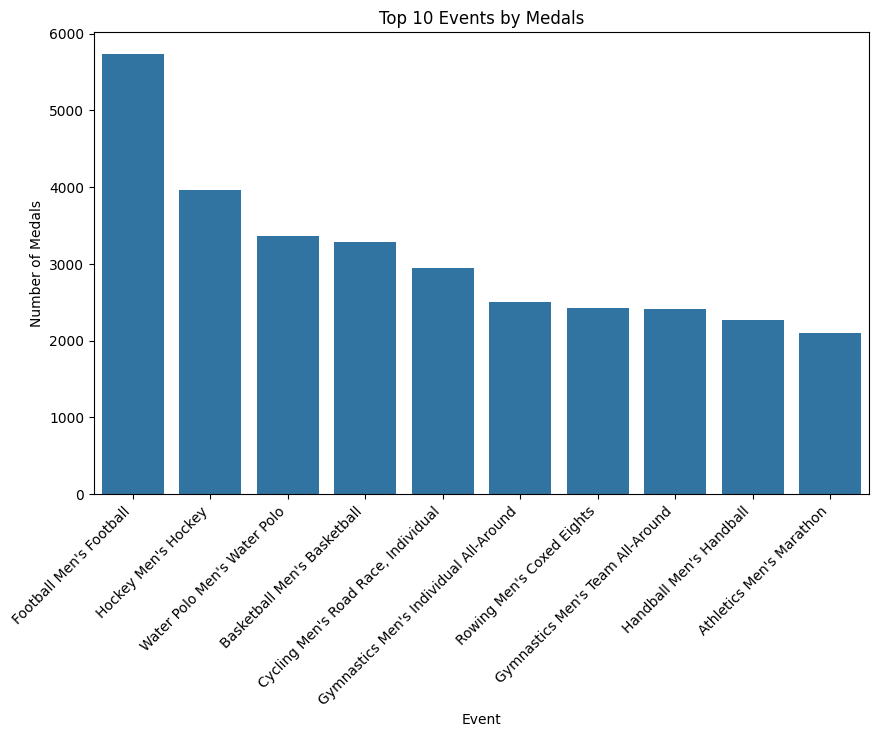

In [13]:
# Number of medals won in each event
medals_by_event = df[df['Medal'] != 'None']['Event'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=medals_by_event.index, y=medals_by_event.values)
plt.title('Top 10 Events by Medals')
plt.xlabel('Event')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.show()


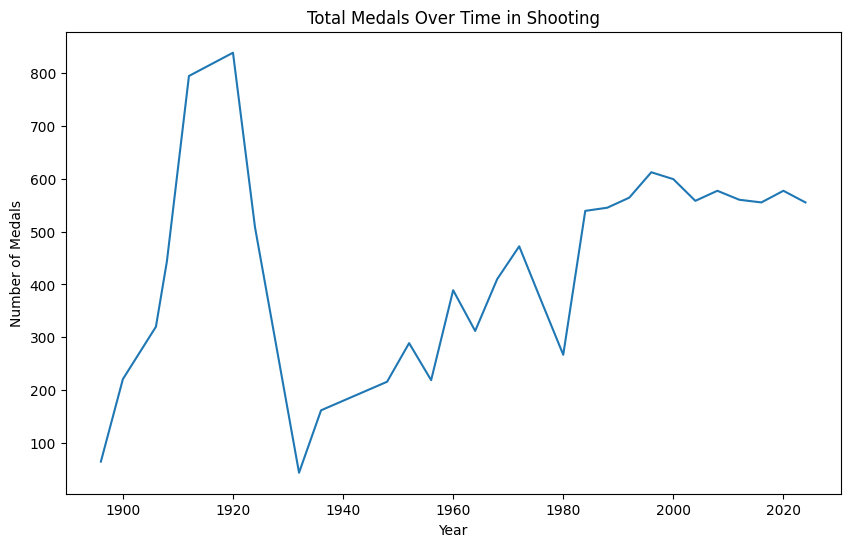

In [14]:
# Total medals over time in 'Swimming'. We can use any sport. Shooting was trending in 2024 olympic so we used it here.
sport = 'Shooting'
medals_per_year_sport = df[(df['Medal'] != 'None') & (df['Sport'] == sport)].groupby('Year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=medals_per_year_sport.index, y=medals_per_year_sport.values)
plt.title(f'Total Medals Over Time in {sport}')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()


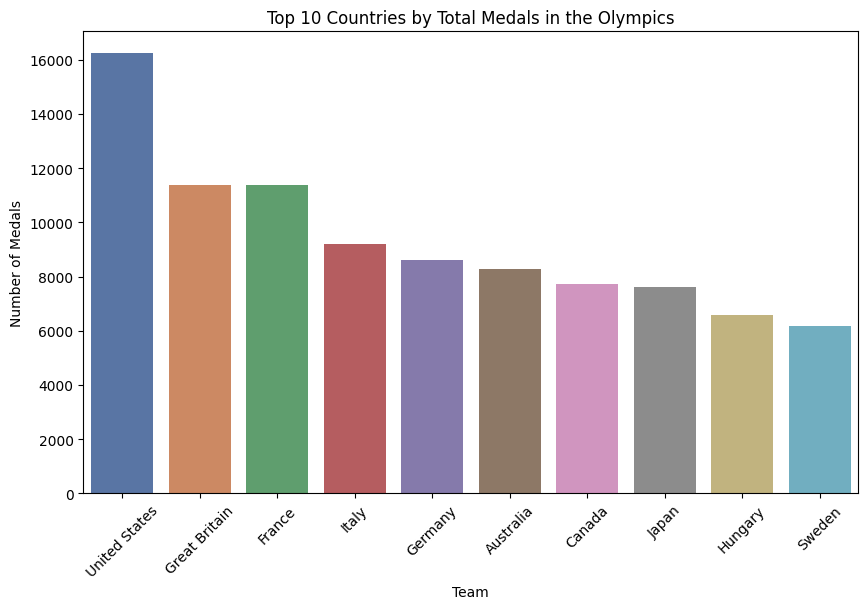

In [15]:
# Top 10 countries by total medals
top_countries = df[df['Medal'] != 'None']['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='deep')
plt.title('Top 10 Countries by Total Medals in the Olympics')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Group by Team (country) and Medal, and count the number of medals
top_countries = df[df['Medal'] != 'None'].groupby(['Team', 'Medal']).size().unstack(fill_value=0).reset_index()

# total medals for each country
top_countries['Total'] = top_countries[['Gold', 'Silver', 'Bronze']].sum(axis=1)

# top 10 countries by total medals
top_10_countries = top_countries.sort_values('Total', ascending=False).head(10)
top_10_countries_melted = top_10_countries.melt(id_vars=['Team'], value_vars=['Gold', 'Silver', 'Bronze'],
                                                var_name='Medal', value_name='Count')

fig = px.bar(
    top_10_countries_melted,
    x='Count',
    y='Team',
    color='Medal',
    orientation='h',
    title='Top 10 Countries by Number and Type of Medals',
    labels={'Count': 'Number of Medals', 'Team': 'Country'},
    color_discrete_map={'Gold':'#FFD700', 'Silver':'#C0C0C0', 'Bronze':'#CD7F32'}
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


In [17]:
# host cities' medal count
medal_counts_per_city = df.groupby(['City', 'Medal']).size().unstack(fill_value=0)
medal_counts_per_city


Medal,Bronze,Gold,No medal,Silver
City,,,,
Amsterdam,250,245,4258,239
Antwerpen,367,493,2984,448
Athina,860,883,12954,859
Atlanta,629,608,11938,605
Barcelona,604,559,11265,549
Beijing,710,671,11554,667
Berlin,295,312,5589,310
Helsinki,300,306,7373,291
London,1214,1215,18802,1195


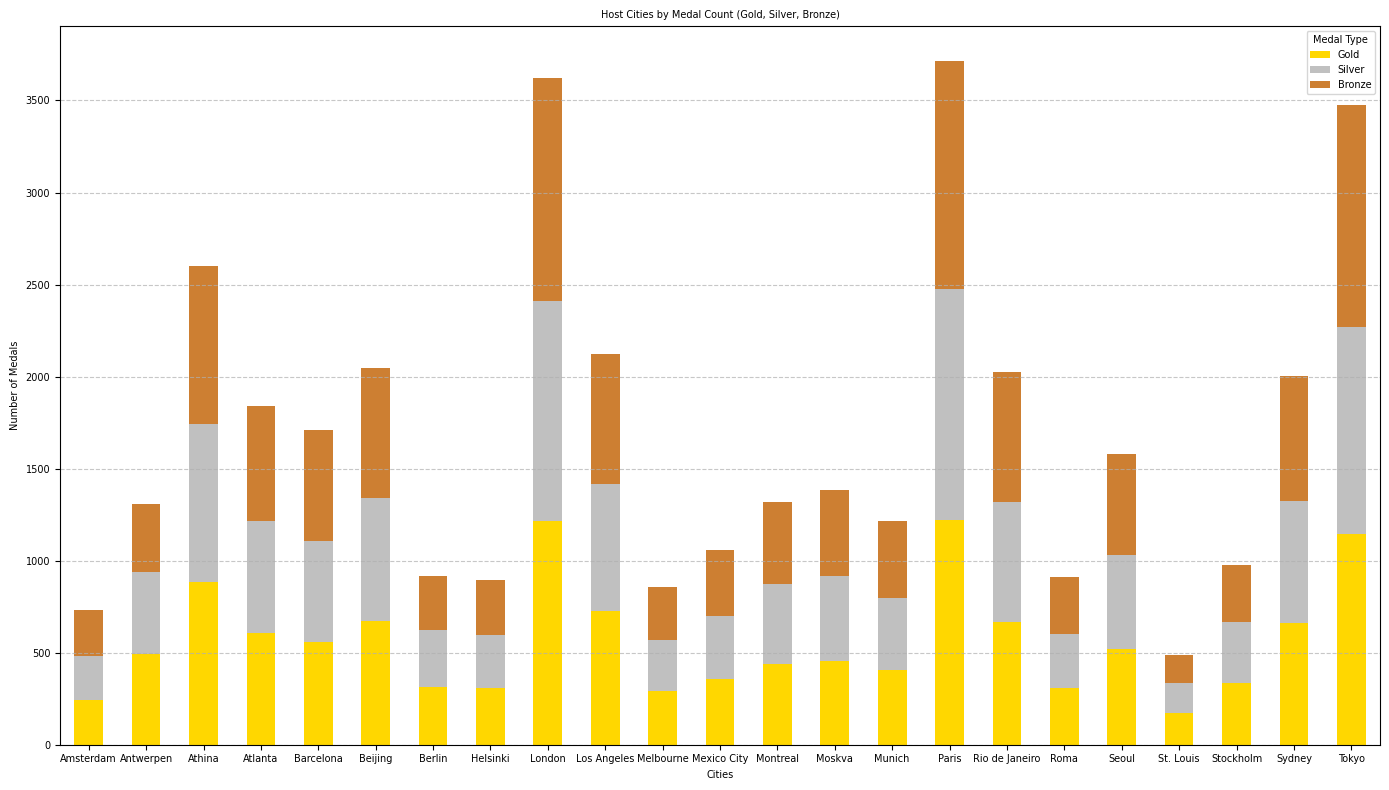

In [18]:
# Stacked bar chart of host cities by medal count
fig, ax = plt.subplots(figsize=(14, 8))
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}

medal_counts_per_city[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax,
                                                         color=[colors['Gold'], colors['Silver'], colors['Bronze']])

ax.set_title('Host Cities by Medal Count (Gold, Silver, Bronze)', fontsize=7)
ax.set_xlabel('Cities', fontsize=7)
ax.set_ylabel('Number of Medals', fontsize=7)
ax.legend(title='Medal Type', fontsize=7, title_fontsize=7)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=7)
plt.xticks(rotation=0, fontsize=7)
plt.tight_layout()
plt.show()



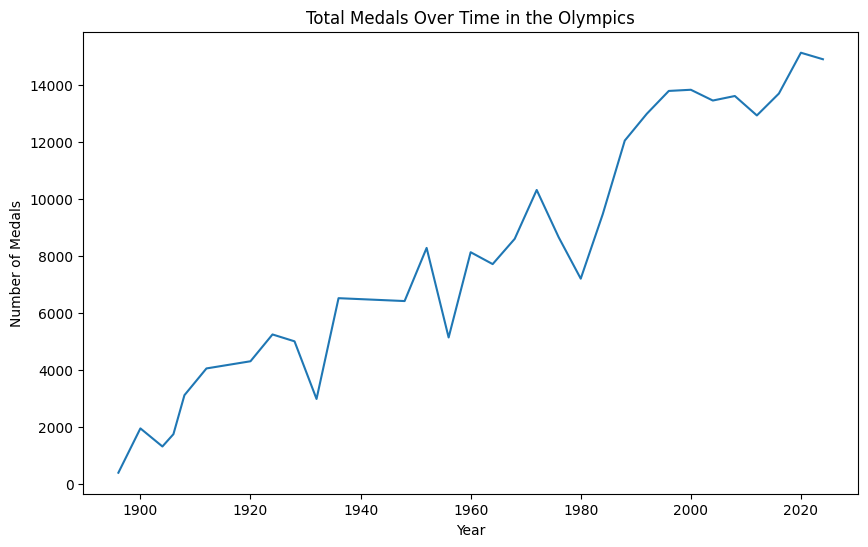

In [19]:
# We now analyze the total medals over time
medals_by_year = df[df['Medal'] != 'None'].groupby('Year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=medals_by_year.index, y=medals_by_year.values)
plt.title('Total Medals Over Time in the Olympics')
plt.ylabel('Number of Medals')
plt.xlabel('Year')
plt.show()

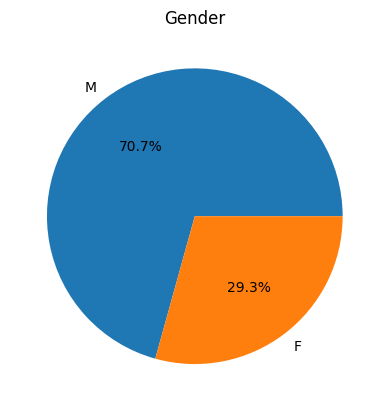

In [20]:
# Graph showing the distribution of genders
sex=df['Sex'].value_counts()
sex.plot.pie(autopct='%1.1f%%')
plt.title('Gender')
plt.ylabel('')
plt.show()

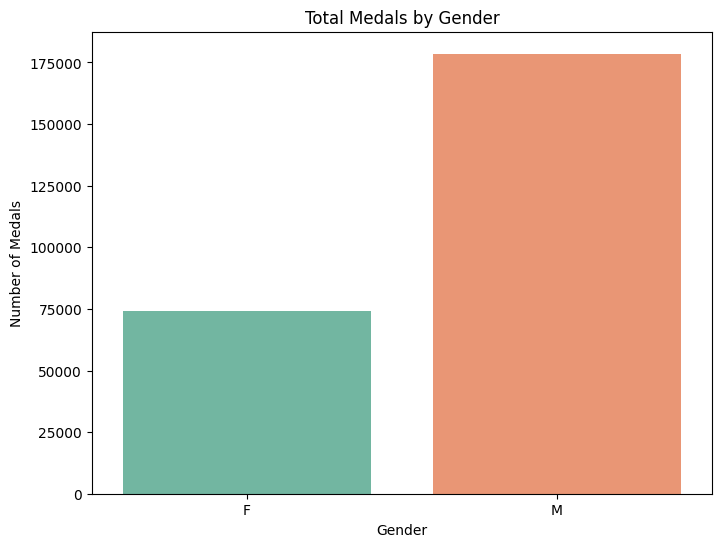

In [21]:
# Graph of medals won by male and female athletes
medals_by_gender = df[df['Medal'] != 'None'].groupby('Sex')['Medal'].count()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=medals_by_gender.index, y=medals_by_gender.values, hue= medals_by_gender.index,palette='Set2')
plt.title('Total Medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.show()


In [22]:
top10_athletes=df['Name'].value_counts().head(10)
top10_athletes

,count
Name,
John Jr.,76
Robert Mckenzie,58
William Jr.,50
Gustaf Carlberg,49
Heikki Savolainen,39
Joseph Stoffel,38
Ioannis Theofilakis,36
Jos Garca,36
Takashi Ono,33


<ipython-input-23-c658dbb6f73f>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



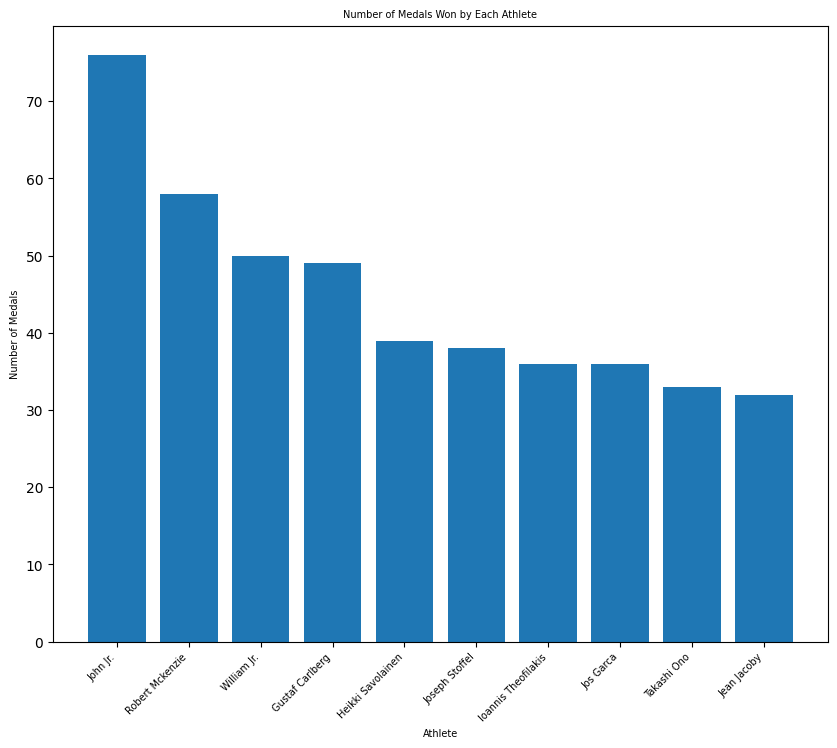

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(top10_athletes.index, top10_athletes.values)
ax.set_xlabel('Athlete', fontsize=7)
ax.set_ylabel('Number of Medals', fontsize=7)
ax.set_title('Number of Medals Won by Each Athlete', fontsize=7)
ax.set_xticklabels(top10_athletes.index, rotation=45, ha='right', fontsize=7)
plt.show()
